In [1]:
import importlib

def install_if_not_installed(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing...")
        !pip install {package}
        print(f"{package} has been successfully installed.")

# Check and install ucimlrepo if not installed
install_if_not_installed("ucimlrepo")

# Import and use ucimlrepo
import ucimlrepo

ucimlrepo is already installed.


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

import warnings     # filter warning messages
warnings.simplefilter(action="ignore")

In [3]:
# Load data into DataFrame

spambase = fetch_ucirepo(id=94)

X = pd.DataFrame(spambase.data.features)
y = pd.DataFrame(spambase.data.targets)

y.value_counts()

Class
0        2788
1        1813
dtype: int64

In [4]:
# Normalize X values to improve the interpretability of coefficients
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the features in X
X_normalized_values = scaler.fit_transform(X)
X = pd.DataFrame(X_normalized_values, columns=X.columns)

X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,...,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03
mean,1.853187e-17,2.779780e-17,2.470916e-17,0.000000,4.941832e-17,3.706374e-17,-2.470916e-17,0.000000,2.470916e-17,1.235458e-17,...,-6.177290e-18,3.088645e-17,-7.412748e-17,1.544322e-17,0.000000,-2.470916e-17,0.000000,4.324103e-17,1.235458e-17,2.470916e-17
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,...,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.115462e-01,-1.584534e-01,-5.143065e-01,-1.551977e-01,-0.329912,-3.083549e-01,-0.103048,-1.321161e-01,-2.625994e-01,-4.656073e-01
25%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.115462e-01,-1.584534e-01,-5.143065e-01,-1.551977e-01,-0.329912,-3.083549e-01,-0.103048,-1.135824e-01,-2.369413e-01,-4.095278e-01
50%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.115462e-01,-1.584534e-01,-2.738561e-01,-1.551977e-01,-0.329912,-3.083549e-01,-0.103048,-9.189671e-02,-1.907567e-01,-3.105639e-01
75%,-3.424337e-01,-1.650719e-01,2.764271e-01,-0.046900,1.007920e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-1.231813e-01,...,-1.115462e-01,-1.584534e-01,1.811501e-01,-1.551977e-01,0.056314,-9.684841e-02,-0.103048,-4.682327e-02,-4.707129e-02,-2.851691e-02
max,1.452700e+01,1.090096e+01,9.560519e+00,30.641278,1.440691e+01,2.112571e+01,1.828261e+01,27.441249,1.855779e+01,2.782844e+01,...,3.488976e+01,1.785384e+01,3.556066e+01,3.715432e+01,39.491909,2.410845e+01,46.086589,3.458704e+01,5.099205e+01,2.566085e+01


In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [6]:
# Model Evaluation

from sklearn.metrics import (confusion_matrix, accuracy_score,
                             precision_score, recall_score,
                             f1_score, classification_report)

'''print("Classification Report:")
print(classification_report(y_test, y_pred))
print()'''

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print()

tn, fp, fn, tp = conf_matrix.ravel()
print("True Positives:", tp)
print("False Positives:", fp)
print("True Negatives:", tn)
print("False Negatives:", fn)
print()

accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
print(f"Accuracy: {accuracy:.3f}")
print(f"Error: {error:.3f}")
print()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Confusion Matrix:
[[650  26]
 [ 63 412]]

True Positives: 412
False Positives: 26
True Negatives: 650
False Negatives: 63

Accuracy: 0.923
Error: 0.077

Precision: 0.941
Recall: 0.867
F1 Score: 0.903


In [7]:
# Print the coefficients of the features
coefficients = model.coef_

# Get feature names
feature_names = X.columns

# Store coefficients and feature names in a list of dictionaries
coefficients_data = [{"Feature": feature_names[i], "Coefficient": coef}
                     for i, coef in enumerate(coefficients[0])]

# Split the data into chunks of 20 rows
chunks = [coefficients_data[i:i+29] for i in range(0, len(coefficients_data), 29)]

# Create a list of DataFrames
dfs = []
for chunk in chunks:
    df = pd.DataFrame(chunk)
    dfs.append(df)

# Concatenate DataFrames
coefficients_df = pd.concat(dfs, axis=1)

# Print DataFrame
print("DataFrame of coefficients:")
print(coefficients_df)

DataFrame of coefficients:
                Feature  Coefficient                     Feature  Coefficient
0        word_freq_make    -0.069984              word_freq_labs    -0.307005
1     word_freq_address    -0.176153            word_freq_telnet    -0.382328
2         word_freq_all     0.065908               word_freq_857    -0.226249
3          word_freq_3d     0.826053              word_freq_data    -0.714125
4         word_freq_our     0.406437               word_freq_415    -0.016514
5        word_freq_over     0.147962                word_freq_85    -0.750331
6      word_freq_remove     0.913560        word_freq_technology     0.446938
7    word_freq_internet     0.182693              word_freq_1999    -0.013100
8       word_freq_order     0.145158             word_freq_parts    -0.141201
9        word_freq_mail     0.041099                word_freq_pm    -0.384496
10    word_freq_receive    -0.083830            word_freq_direct    -0.153846
11       word_freq_will    -0.080755 

In [8]:
# Make predictions on the testing data
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
thresholds = [0.25, 0.50, 0.75, 0.90]

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []

print("Metrics for different thresholds:")
for threshold in thresholds:
    # Classify instances based on the threshold
    y_pred_thresholded = (y_probs >= threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_thresholded)
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    # Print the metrics
    print(f"\nThreshold = {threshold}")
    print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}.")

Metrics for different thresholds:

Threshold = 0.25
Accuracy: 0.913, Precision: 0.852, Recall: 0.956.

Threshold = 0.5
Accuracy: 0.923, Precision: 0.941, Recall: 0.867.

Threshold = 0.75
Accuracy: 0.885, Precision: 0.957, Recall: 0.756.

Threshold = 0.9
Accuracy: 0.828, Precision: 0.973, Recall: 0.600.


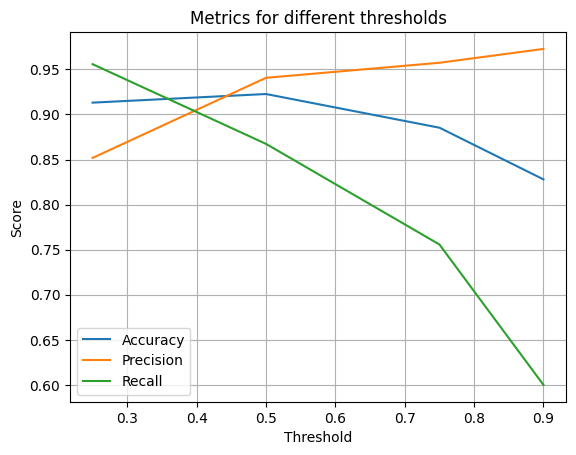

In [9]:
# Plotting the metrics

import matplotlib.pyplot as plt

plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics for different thresholds')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [10]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Print evaluation metrics for training data
print("Evaluation metrics for training data:")
print(f"Accuracy: {train_accuracy:.3f}")
print(f"Precision: {train_precision:.3f}")
print(f"Recall: {train_recall:.3f}")
print(f"F1 Score: {train_f1:.3f}")
print()

# Evaluate the model's performance on the testing data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics for testing data
print("Evaluation metrics for testing data:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Evaluation metrics for training data:
Accuracy: 0.926
Precision: 0.924
Recall: 0.881
F1 Score: 0.902

Evaluation metrics for testing data:
Accuracy: 0.923
Precision: 0.941
Recall: 0.867
F1 Score: 0.903


In [11]:
# My own k-fold cross-validation algorithm

import numpy as np

def k_fold_cross_validation(model, X, y, k):
    n = len(X)
    fold_size = n // k
    validation_errors = []

    for i in range(k):
        # Split the data into training and validation sets
        validation_indices = np.arange(i * fold_size, min((i + 1) * fold_size, n))
        training_indices = np.concatenate([np.arange(0, i * fold_size),
                                           np.arange((i + 1) * fold_size, n)])

        X_train, y_train = X.iloc[training_indices], y.iloc[training_indices]
        X_val, y_val = X.iloc[validation_indices], y.iloc[validation_indices]

        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model on the validation set
        validation_error = 1 - model.score(X_val, y_val)
        validation_errors.append(validation_error)

    # Compute and print the average validation error
    avg_validation_error = np.mean(validation_errors)
    return avg_validation_error


error_df = pd.DataFrame(columns=['k', 'error'])

for k in range(5, 11):
    avg_error = k_fold_cross_validation(model, X, y, k)
    error_df = error_df.append({'k': k, 'error': avg_error}, ignore_index=True)

print(error_df)

      k     error
0   5.0  0.141522
1   6.0  0.124021
2   7.0  0.128071
3   8.0  0.116522
4   9.0  0.105458
5  10.0  0.109783
